# **Samsung Phone Specification Classifier**

<img src="https://github.com/Misfit911/Samsung-Phone-Specification-Categorizer/assets/127237815/ee873031-85dc-4d6b-834d-2774174a038a" width="1100" height="500">

##### Author: Bradley Ouko
---

# **Overview**

By addressing the real-world challenge of understanding mobile phone success factors and setting an affordable price, Samsung can enhance its market position and customer satisfaction. The choice of the Spec_score_binary as the target variable aligns well with the project goals.

The evaluation results indicate strong model performance, especially with the decision tree and random forest classifiers. The perfect accuracy achieved by these models suggests that they are suitable for predicting whether a phone is high-spec or low-spec. The implications for Samsung include optimizing marketing strategies, resource allocation, and overall customer satisfaction.

# **Business Understanding**
---
# **Business Problem**
Samsung wants to launch a new product in the market. As a data scientist working for Samsung, I have been tasked to gain valuable insights from the dataset related to mobile phones. That way, it can gain an understanding of the factors that contribute to a phone’s success or failure and hence set an affordable price that will increase sales. The goal is to drive sales up📈 by offering a high spec product at an affordable price. Samsung wants to know which features will cost less to produce and have a high profit margin as well when sold.

## **Stakeholders**
1. **Samsung Product Team:**
    * They can use the insights to enhance product features, prioritize improvements, and optimize marketing strategies.

    * **Team Goal:** Improve Samsung’s market share and customer satisfaction.

2. **Sales and Marketing Teams:**
    * They can leverage the findings to tailor advertising campaigns, target specific customer segments, and highlight key features.

    * **Team Goal:** Increase sales and revenue.

3. **Consumers and Potential Buyers:**
    * They benefit indirectly from better products and informed purchasing decisions.

    * **Team Goal:** Make informed choices when buying a phone.

### **Conclusion**
The project’s implications lie in improving Samsung’s competitiveness, understanding customer preferences, and driving innovation. By addressing this problem, Samsung is able to enhance user experiences and hence its success.✅

# **Data Understanding**
---

## **Dataset Suitability**
The dataset is suitable for the project because it contains relevant information about mobile phones, including specifications, ratings, prices, and features. It covers various aspects that impact a phone’s success in the market.

## **Feature Justification**
1. **Rating**: Captures user satisfaction, which directly affects sales and brand reputation.

2. **Spec_score**: Reflects technical specifications, influencing perceived value.

3. **Price**: Critical for consumer decisions.

4. **Company**: Brand reputation plays a significant role.

5. **Android_version**: Relevant for software compatibility and user experience.

6. **Battery, Camera, RAM, Display**: Key features affecting user satisfaction.

7. **Fast Charging**: A desirable feature.

8. **Processor**: Influences performance.

9. **External_Memory, Inbuilt_memory**: Storage options matter to users.

10. **Screen_resolution**: Affects display quality.

### **Limitations**
1. **Subjectivity**: Ratings are subjective and may not fully represent technical quality.

2. **Missing Data**: Check for missing values and handle them appropriately.

3. **Market Trends**: The dataset might not capture recent trends.

## **Project Objectives**
### **Main Objective:**
Create a machine learning model that predicts the specification rating based on the features. This can comes in handy when the stakeholders want to know which product features are ideal for their new product launch campaign.🚀

**Specific Objectives:**
1. **Feature Selection and Exploration:**
    * Explore relationships between features and the chosen target variable.
    * Identify relevant features for model training.

2. **Model Building and Evaluation:**
    * Develop and evaluate machine learning models (e.g., logistic regression, decision trees, random forests) using the selected target variable.
    * Optimize model performance using appropriate metrics (accuracy, precision, recall, etc.).

3. **Interpretability and Insights:**
    * Interpret model results to understand feature importance.
    * Provide actionable insights for Samsung’s product team.

**Target Variable**

- `Spec_score_binary` is the target variable.

- This binary variable classifies phones as either `High-Spec`(spec_score >= 70) or `Low-Spec`. It directly reflects user satisfaction and guides on product improvements and Quality Control.

*Let's dive into it!*

![dive ](https://github.com/Misfit911/Samsung-Phone-Specification-Categorizer/assets/127237815/7213b699-4bc3-4b40-b4a1-6d8421af0cd8)

*Import modules*

In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary modules for Modelling
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Imbalanced correction
from imblearn.over_sampling import SMOTE

# Models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import modeling toolkit
import mods
from mods import DataSourcing, DataPreprocessing, DataAnalysis, DataModeling

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score

# Plot_roc_curves
from IPython.display import display, HTML
from sklearn.metrics import roc_curve, auc

# Filter warnings
import warnings
warnings.filterwarnings('ignore')


*Load the data set.*

In [2]:
# Call the DataSourcing() class
load = DataSourcing()
data = load.open_file('data\mobile_phone_data.csv')
load.dataframe_details(data)

DATAFRAME SHAPE: (1370, 18)


DATAFRAME HEAD:
   Index                                  Name  Rating  Spec_score  \
0      0                 Samsung Galaxy F14 5G    4.65          68   
1      1                    Samsung Galaxy A11    4.20          63   
2      2                    Samsung Galaxy A13    4.30          75   
3      3                    Samsung Galaxy F23    4.10          73   
4      4  Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   

                       No_of_sim       Ram            Battery     Display  \
0  Dual Sim, 3G, 4G, 5G, VoLTE,   4 GB RAM  6000 mAh Battery   6.6 inches   
1      Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  4000 mAh Battery   6.4 inches   
2      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.6 inches   
3      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM   6000 mAh Battery  6.4 inches   
4      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.5 inches   

                                              Camera  \
0    50 MP + 2

# **Data Preparation**
---
## **Data Cleaning**

*Feature Engineering* & *Encoding Columns*

In [3]:
# Initialize data preprocessing
dp = DataPreprocessing()

# Convert 'Rating' to binary (good/bad) based on a 
# threshold (4 stars or higher = good)
dp.create_rating_category(data)

# Convert 'Spec_score' to binary (high-spec/low-spec)
# based on a threshold (high-spec >= 70)
dp.create_spec_score_category(data)

# Convert 'Price' to binary (affordable/expensive) 
# based on a threshold (expensive >= upper quartile price)
dp.create_price_category(data)

# Create the Company categories: Samsung, Other Brands
dp.create_company_category(data)

# Convert versions to numeric and create new column: version_category
dp.create_version_category(data)

# Convert column values to binary: Supports fast charging, Does not support fast charging
dp.create_fast_charging_column(data)

# Convert Display to numeric and create new column: display_size_inches
dp.convert_display_to_numeric(data)

# Convert Battery to numeric and create new column: Battery_numeric
dp.convert_battery_to_numeric(data)

# Filters unwanted values in RAM
dp.filter_ram_values(data)



### Dealing with missing values
*Check for missing values*

In [4]:
# Use the methods to perform the desired data processing tasks
dp.check_null_values(data)

Index                        0
Name                         0
Rating                       0
Spec_score                   0
No_of_sim                    0
Ram                          0
Battery                      0
Display                      0
Camera                       0
External_Memory              0
Android_version            443
Price                        0
company                      0
Inbuilt_memory              19
fast_charging                0
Screen_resolution            2
Processor                   28
Processor_name               0
Rating_binary                0
rating_category              0
Spec_score_binary            0
Spec_score_category          0
Price_binary                 0
Price_category               0
Company_category             0
Android_version_cleaned    443
Android_version_numeric    443
Version_category             0
Display_size_inches         16
Battery_numeric              1
filtered_ram                20
dtype: int64

Total number of null valu

['Android_version',
 'Inbuilt_memory',
 'Screen_resolution',
 'Processor',
 'Android_version_cleaned',
 'Android_version_numeric',
 'Display_size_inches',
 'Battery_numeric',
 'filtered_ram']

*Impute missing values*

In [5]:
# Impute using the mean and most_frequent strategies
dp.impute_missing_values(data)
dp.check_null_values(data)

There are no null values in the data.


*Check for duplicates*

In [6]:
dp.check_duplicates(data)

There are 0 duplicates in the data.


In [7]:
# Visualize the dataframe
data.head()

,Index,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,...,Spec_score_category,Price_binary,Price_category,Company_category,Android_version_cleaned,Android_version_numeric,Version_category,Display_size_inches,Battery_numeric,filtered_ram
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",...,Low-Spec,1,Affordable,Samsung,13,13.0,Android 11+,6.6,6000.0,4 GB RAM
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",...,Low-Spec,1,Affordable,Samsung,10,10.0,Older Versions,6.4,4000.0,2 GB RAM
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",...,Low-Spec,1,Affordable,Samsung,12,12.0,Android 11+,6.6,5000.0,4 GB RAM
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",...,Low-Spec,1,Affordable,Samsung,12,12.0,Android 11+,6.4,6000.0,4 GB RAM
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",...,Low-Spec,1,Affordable,Samsung,11,11.0,Android 11+,6.5,5000.0,4 GB RAM


# **Data Analysis**
---

*Create box plots and histograms for all numeric columns*

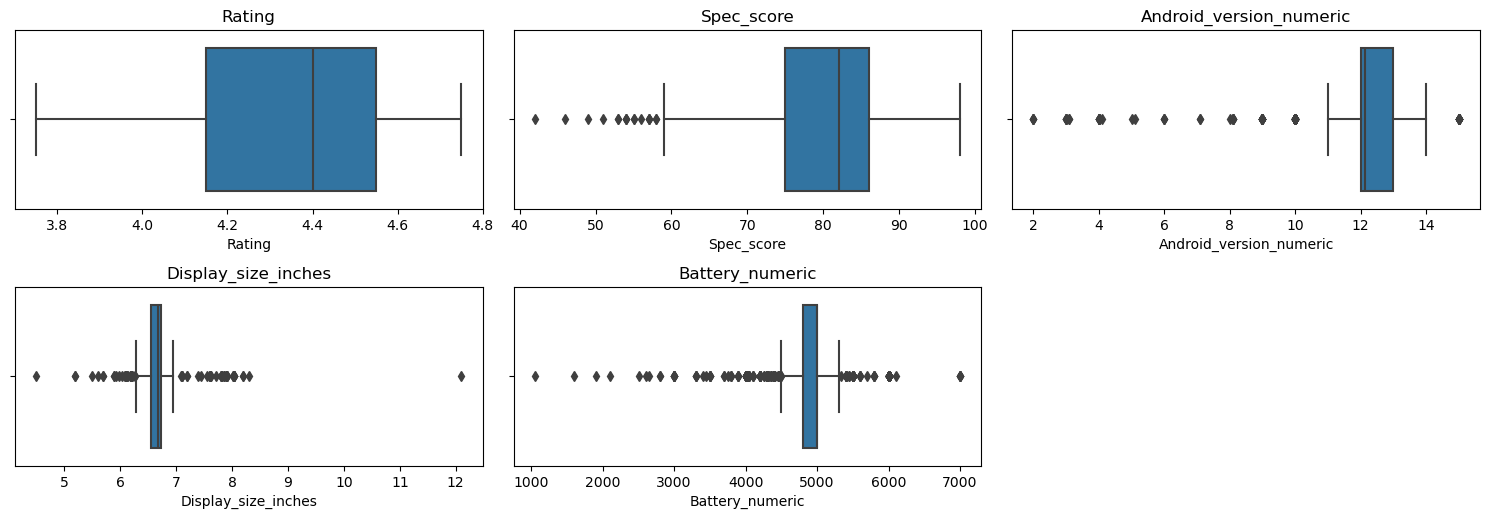

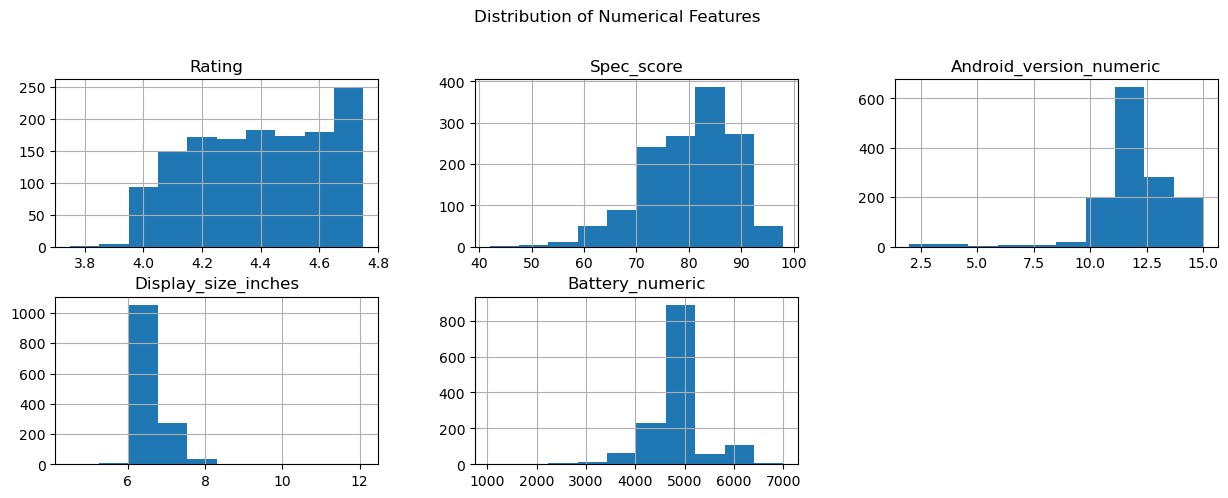

In [8]:
# Initialize the Data Visualization and Analysis class
eda= DataAnalysis(data)

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns
numeric_col_li = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_cols = [col for col in numeric_col_li if col != 'Index']

# Display plots for numeric columns
eda.plot_boxplots(data, numeric_cols)
eda.plot_histograms(data, numeric_cols)

*Plot count plots to visualize column categories*

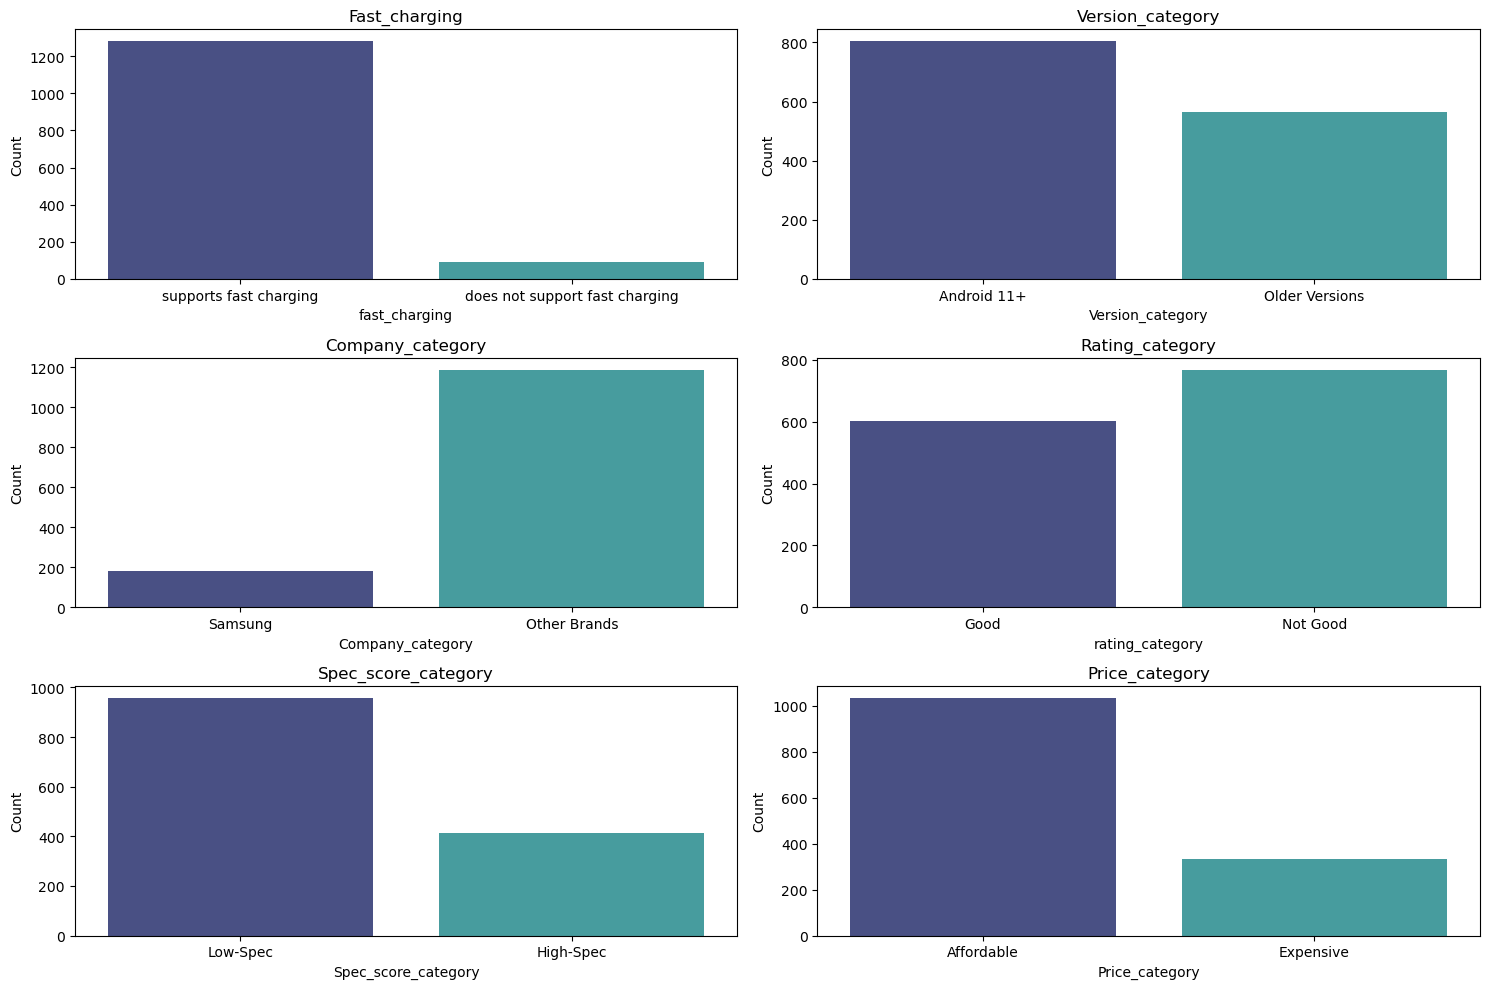

In [9]:
relevant_cols = ['fast_charging', 'Version_category', 'Company_category',
                 'rating_category', 'Spec_score_category', 'Price_category']

eda.plot_countplots(data, relevant_cols)

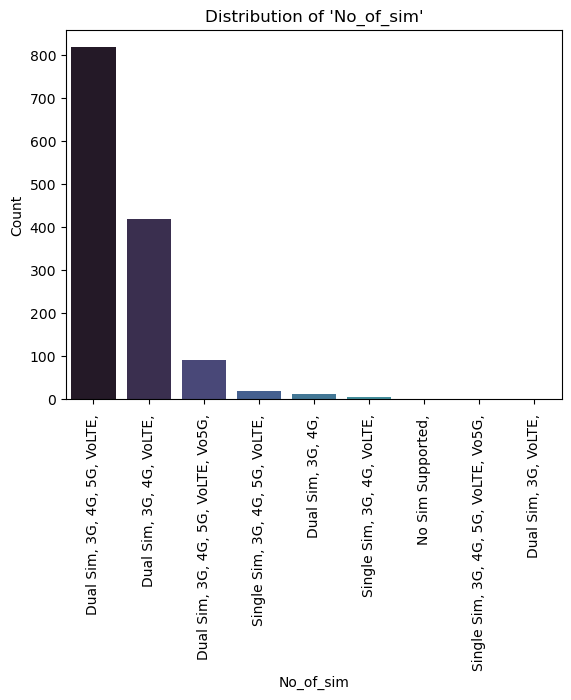

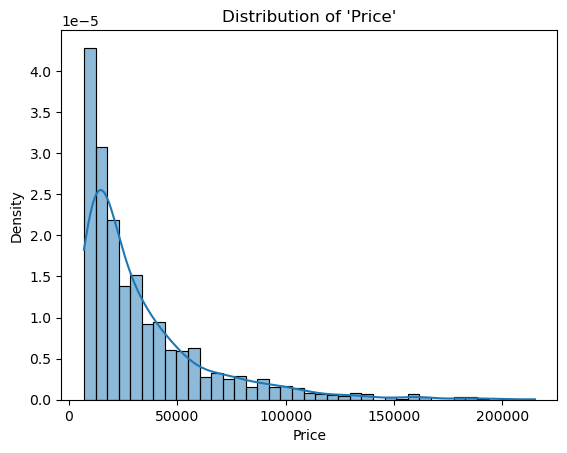

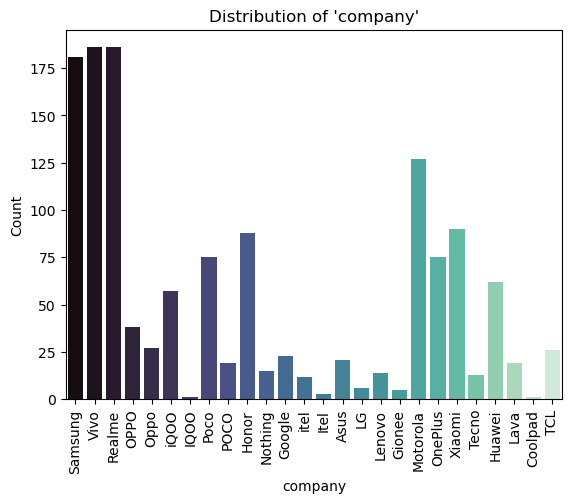

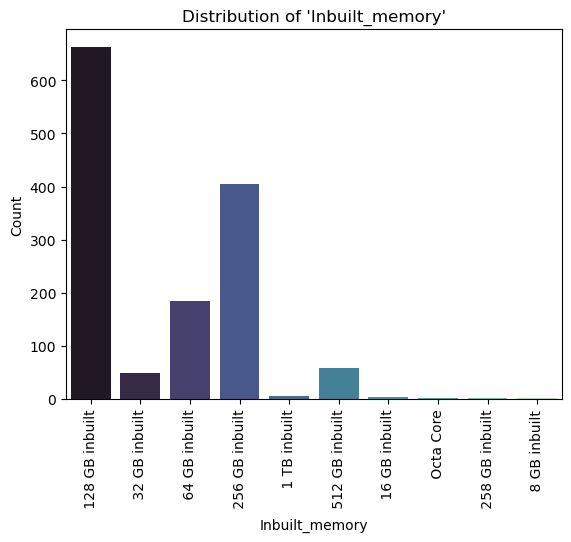

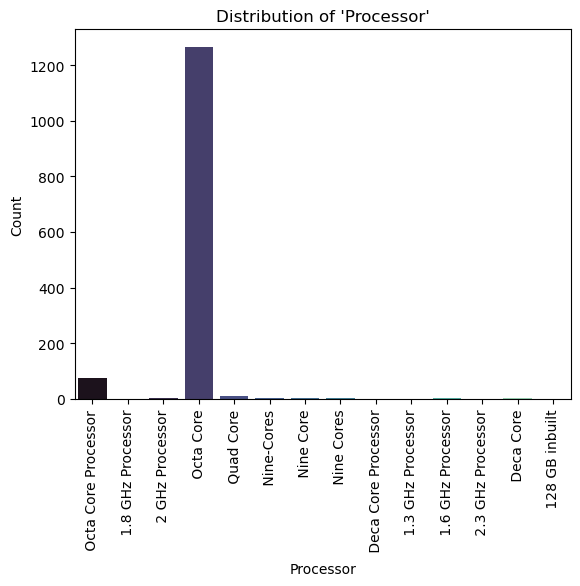

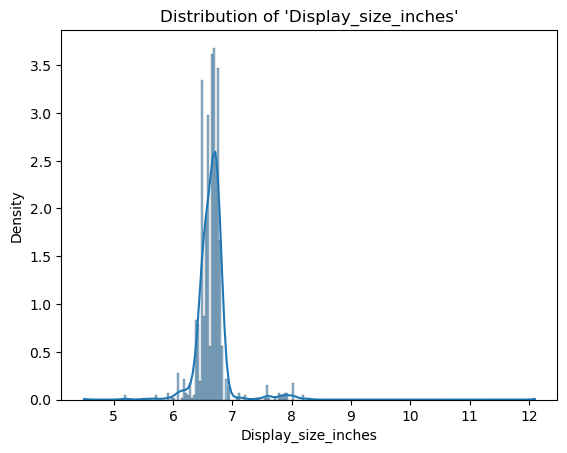

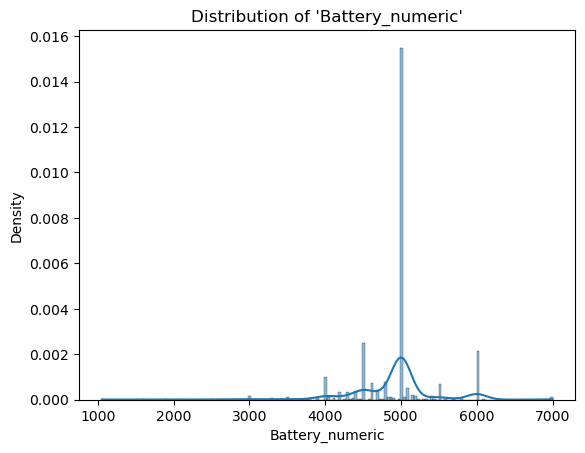

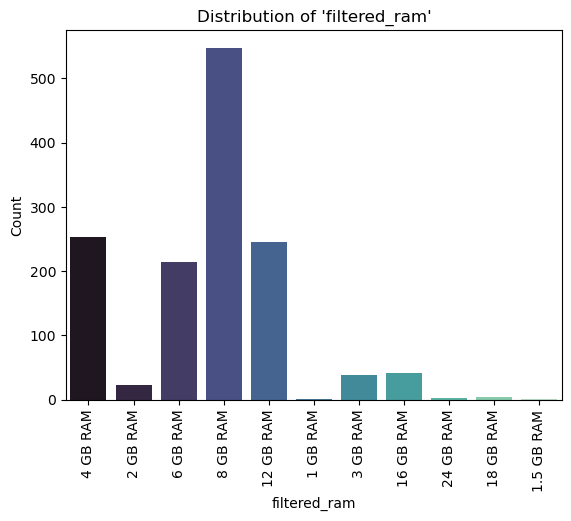

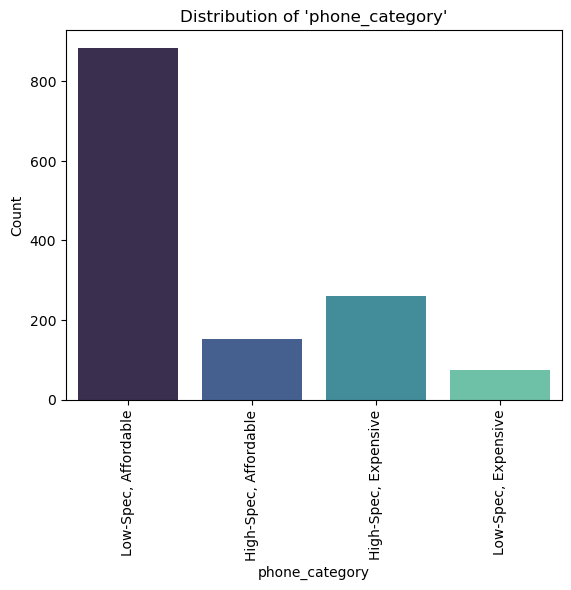

In [32]:
# List of columns to exclude
exclude = ['Index','Ram', 'Android_version', 'fast_charging', 'Version_category', 'Company_category',
            'Rating', 'Spec_score', 'Android_version_numeric', 'Name',
            'Battery', 'Display', 'Camera', 'External_Memory', 'Screen_resolution',
            'Processor_name', 'Price_binary', 'Spec_score_binary', 'Rating_binary',
            'Spec_score_category', 'rating_category','Price_category', 'Android_version_cleaned']

# Call the function with the DataFrame and the list of columns to exclude
eda.check_distribution(data, exclude_columns=exclude)


*Further feature Encoding for correlation analysis purposes*

In [11]:
# One-hot encode categorical variables
new_data = eda.encode_categorical_features(data)

In [12]:
new_data.columns

Index(['Index', 'Name', 'Rating', 'Spec_score', 'Battery', 'Display', 'Camera',
       'External_Memory', 'Android_version', 'Price', 'company',
       'fast_charging', 'Screen_resolution', 'Processor_name', 'Rating_binary',
       'rating_category', 'Spec_score_binary', 'Spec_score_category',
       'Price_binary', 'Price_category', 'Android_version_cleaned',
       'Android_version_numeric', 'Version_category', 'Display_size_inches',
       'Battery_numeric', 'filtered_ram', 'No_of_sim_Dual Sim, 3G, 4G, ',
       'No_of_sim_Dual Sim, 3G, 4G, 5G, VoLTE, ',
       'No_of_sim_Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, ',
       'No_of_sim_Dual Sim, 3G, 4G, VoLTE, ',
       'No_of_sim_Dual Sim, 3G, VoLTE, ', 'No_of_sim_No Sim Supported, ',
       'No_of_sim_Single Sim, 3G, 4G, 5G, VoLTE, ',
       'No_of_sim_Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, ',
       'No_of_sim_Single Sim, 3G, 4G, VoLTE, ', 'Ram_1 GB RAM',
       'Ram_1.5 GB RAM', 'Ram_12 GB RAM', 'Ram_128 GB inbuilt',
       'Ram_16 GB RAM'

*Correlation Analysis*

In [13]:
eda.correlation(data)

The following columns were dropped due to being object types:
['Name', 'No_of_sim', 'Ram', 'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version', 'company', 'Inbuilt_memory', 'fast_charging', 'Screen_resolution', 'Processor', 'Processor_name', 'rating_category', 'Spec_score_category', 'Price_category', 'Company_category', 'Android_version_cleaned', 'Version_category', 'filtered_ram']


,Index,Rating,Spec_score,Price,Rating_binary,Spec_score_binary,Price_binary,Android_version_numeric,Display_size_inches,Battery_numeric
Index,1.000000,0.026233,-0.044236,-0.076589,0.041443,-0.086762,0.050750,-0.049842,-0.001671,0.018930
Rating,0.026233,1.000000,0.056510,0.004403,0.852661,0.035216,0.004276,0.043829,0.046106,0.087285
Spec_score,-0.044236,0.056510,1.000000,0.644035,0.042030,0.682920,-0.533675,0.189046,0.344731,0.035791
Price,-0.076589,0.004403,0.644035,1.000000,-0.001914,0.621674,-0.803786,-0.011104,0.449951,-0.158609
Rating_binary,0.041443,0.852661,0.042030,-0.001914,1.000000,0.026500,0.013552,0.033417,0.026194,0.072936
Spec_score_binary,-0.086762,0.035216,0.682920,0.621674,0.026500,1.000000,-0.593485,0.056186,0.260442,-0.097654
Price_binary,0.050750,0.004276,-0.533675,-0.803786,0.013552,-0.593485,1.000000,0.053860,-0.298294,0.136713
Android_version_numeric,-0.049842,0.043829,0.189046,-0.011104,0.033417,0.056186,0.053860,1.000000,0.197192,0.227011
Display_size_inches,-0.001671,0.046106,0.344731,0.449951,0.026194,0.260442,-0.298294,0.197192,1.000000,0.070953
Battery_numeric,0.018930,0.087285,0.035791,-0.158609,0.072936,-0.097654,0.136713,0.227011,0.070953,1.000000


The following columns were dropped due to being object types:
['Name', 'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version', 'company', 'fast_charging', 'Screen_resolution', 'Processor_name', 'rating_category', 'Spec_score_category', 'Price_category', 'Android_version_cleaned', 'Version_category', 'filtered_ram']
Correlation to Spec_score_binary


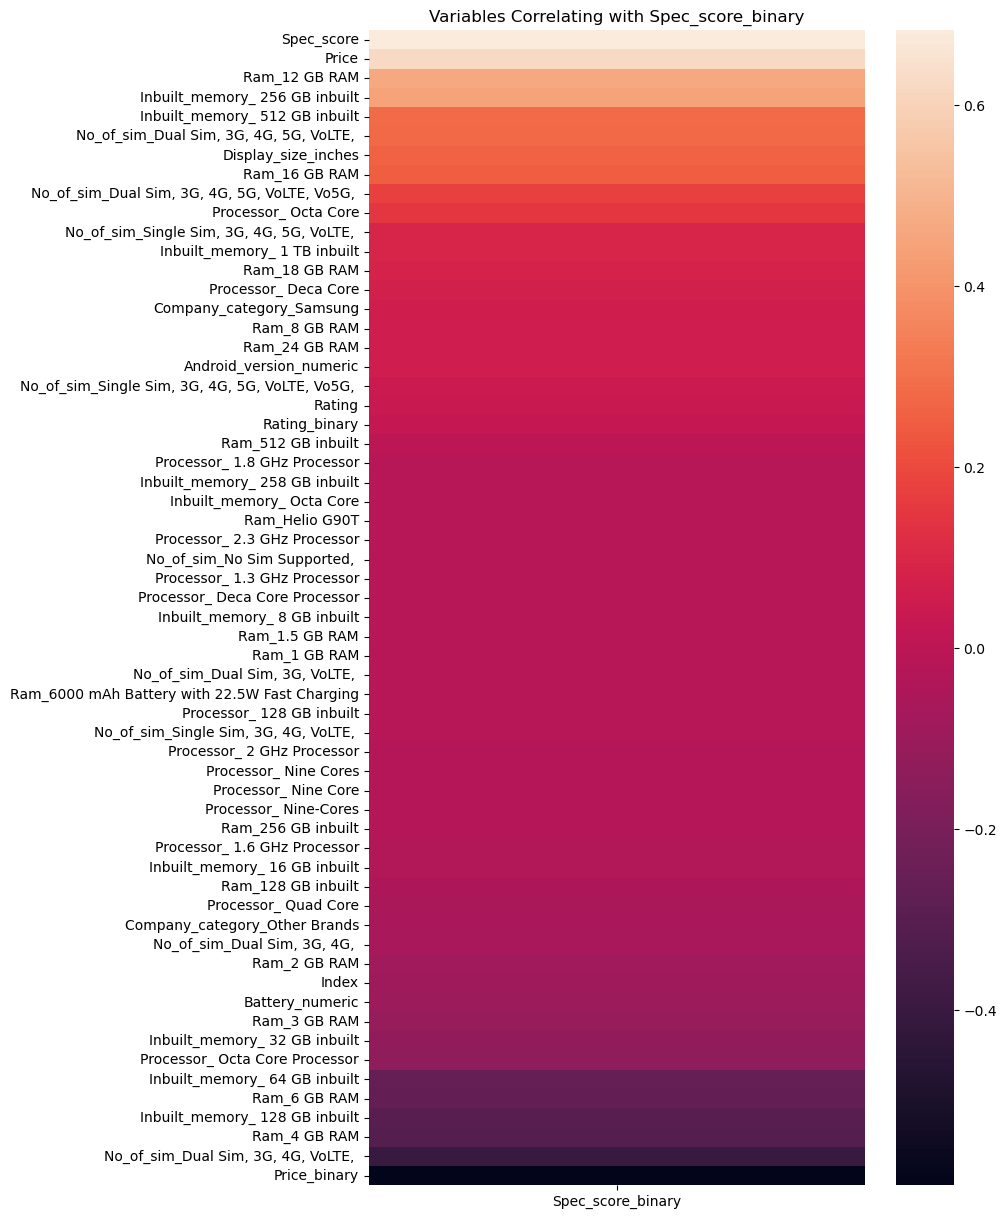

In [14]:
eda.plot_correlation_heatmap(new_data, column_of_interest='Spec_score_binary')

The following columns were dropped due to being object types:
['Name', 'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version', 'company', 'fast_charging', 'Screen_resolution', 'Processor_name', 'rating_category', 'Spec_score_category', 'Price_category', 'Android_version_cleaned', 'Version_category', 'filtered_ram']
Correlation to Price


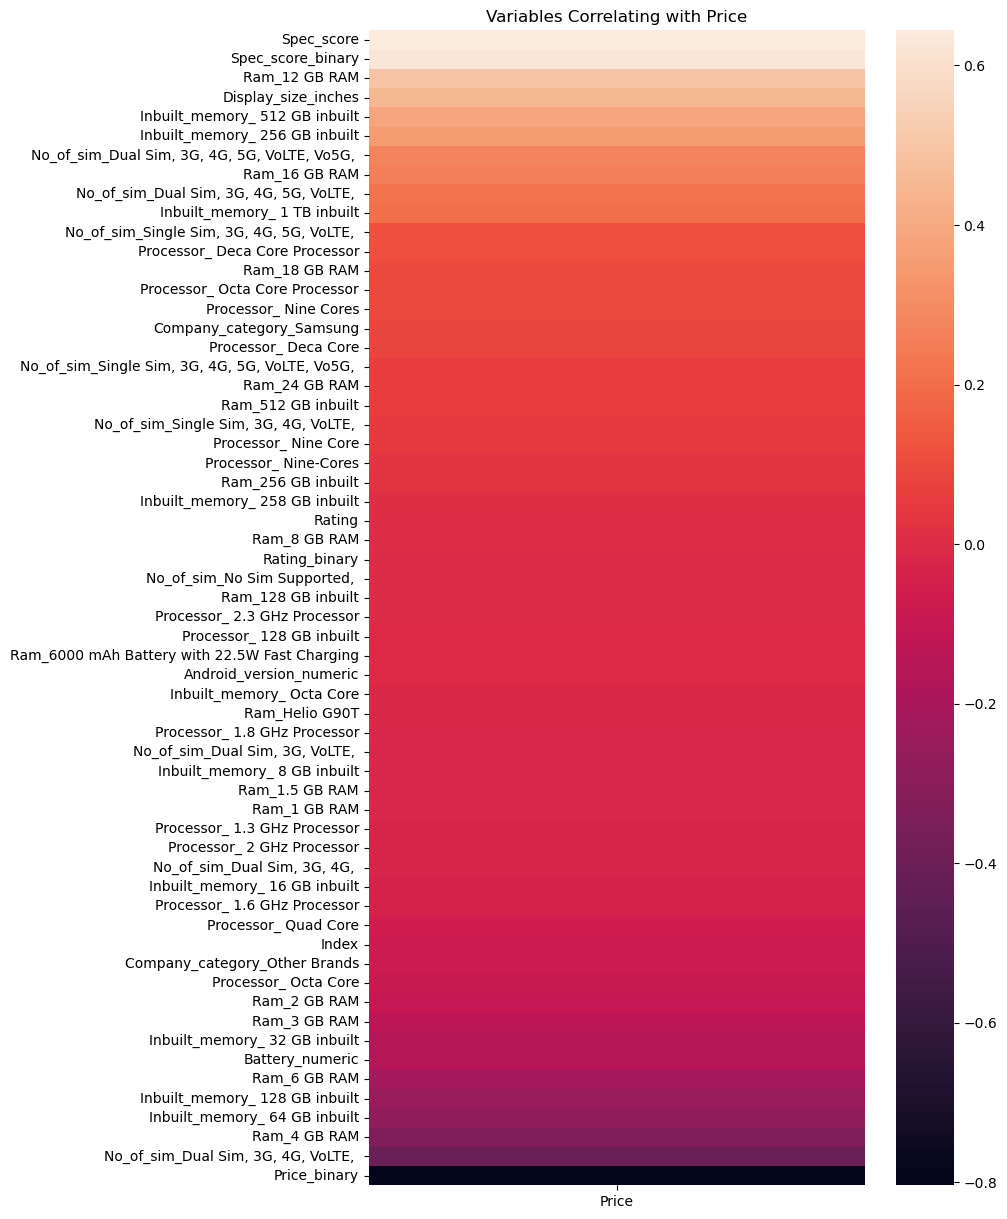

In [15]:
eda.plot_correlation_heatmap(new_data, column_of_interest='Price')

The following columns were dropped due to being object types:
['Name', 'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version', 'company', 'fast_charging', 'Screen_resolution', 'Processor_name', 'rating_category', 'Spec_score_category', 'Price_category', 'Android_version_cleaned', 'Version_category', 'filtered_ram']
Correlation to Price_binary


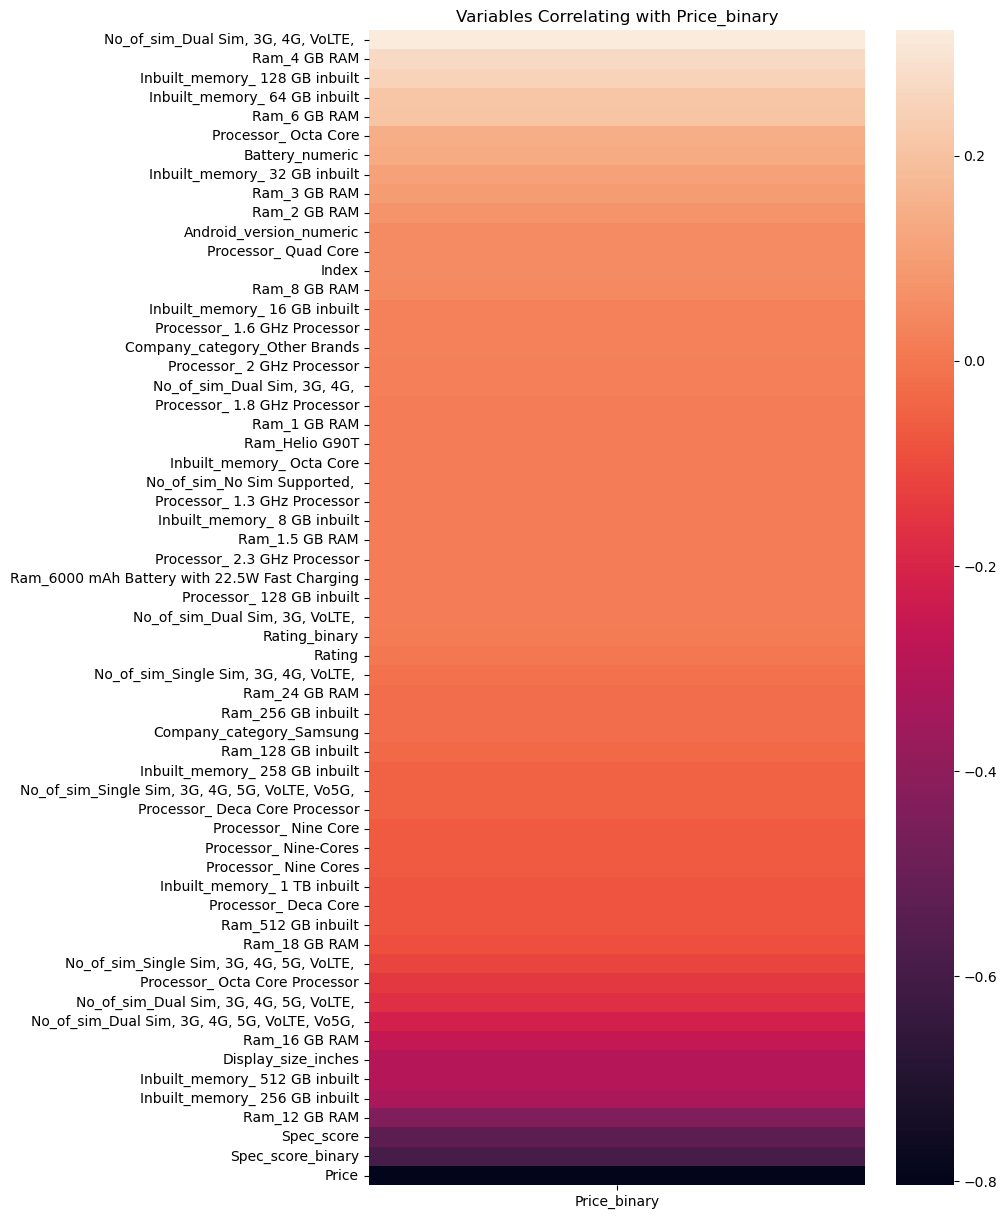

In [16]:
eda.plot_correlation_heatmap(new_data, column_of_interest='Price_binary')

# **Data Modelling**
---


*Drop columns for modelling purposes*

In [17]:
# Drop columns no longer applicable in this section
object_columns = new_data.select_dtypes(include=['object'])
obj_col_list = object_columns.columns.tolist()

eda.drop_columns(new_data, obj_col_list)
# Drop columns with high correlation with target variables
high_cor_list = ['Price', 'Spec_score']
mod_data = eda.drop_columns(new_data, high_cor_list)

*Model the data*
### **Base Model - Phone Specification Classifier (High-Spec or Low-Spec)**
---

*Initialize the Data Modeling class*

In [18]:
mod = DataModeling(new_data)

*Split the data into training and testing sets*

In [19]:
# Base Model
# Split the data into features and Spec_score_binary
X_train, X_test, y_train, y_test= mod.split_data(new_data, 'Spec_score_binary')

In [20]:
X_train.shape

(959, 58)

In [21]:
y_train.shape

(959,)

In [22]:
mod.modelplotting_evaluation(X_train, X_test, y_train, y_test)

Model: LogisticRegression(random_state=42)
--------------------------------------------------------------------------------
Confusion matrix:

 [[273  10]
 [ 48  80]]

Classification report:               precision    recall  f1-score   support

           0       0.85      0.96      0.90       283
           1       0.89      0.62      0.73       128

    accuracy                           0.86       411
   macro avg       0.87      0.79      0.82       411
weighted avg       0.86      0.86      0.85       411

Accuracy: 0.8588807785888077
Precision: 0.8888888888888888
Recall: 0.625
F1 score: 0.7339449541284404
--------------------------------------------------------------------------------

Cross-Validation Scores: [0.86979167 0.90625    0.84895833 0.86979167 0.90575916]
Mean CV Accuracy: 0.8801101657940663

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
--------------------------------------------------

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(random_state=42),0.858881,0.625000,0.888889,0.733945
1,DecisionTreeClassifier(random_state=42),0.844282,0.734375,0.758065,0.746032
2,RandomForestClassifier(random_state=42),0.875912,0.742188,0.840708,0.788382
3,KNeighborsClassifier(),0.781022,0.539062,0.690000,0.605263


*Apply SMOTE to deal with class imbalance*

In [23]:
X_train_resampled, y_train_resampled = mod.apply_smote(X_train, y_train)

In [24]:
mod.modelplotting_evaluation(X_train_resampled, X_test, y_train_resampled, y_test)

Model: LogisticRegression(random_state=42)
--------------------------------------------------------------------------------
Confusion matrix:

 [[244  39]
 [ 19 109]]

Classification report:               precision    recall  f1-score   support

           0       0.93      0.86      0.89       283
           1       0.74      0.85      0.79       128

    accuracy                           0.86       411
   macro avg       0.83      0.86      0.84       411
weighted avg       0.87      0.86      0.86       411

Accuracy: 0.8588807785888077
Precision: 0.7364864864864865
Recall: 0.8515625
F1 score: 0.7898550724637682
--------------------------------------------------------------------------------

Cross-Validation Scores: [0.84810127 0.80508475 0.86864407 0.91949153 0.86016949]
Mean CV Accuracy: 0.8602982192662518

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
----------------------------------------------

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(random_state=42),0.858881,0.851562,0.736486,0.789855
1,DecisionTreeClassifier(random_state=42),0.841849,0.687500,0.778761,0.730290
2,RandomForestClassifier(random_state=42),0.873479,0.773438,0.811475,0.792000
3,KNeighborsClassifier(),0.788321,0.695312,0.649635,0.671698


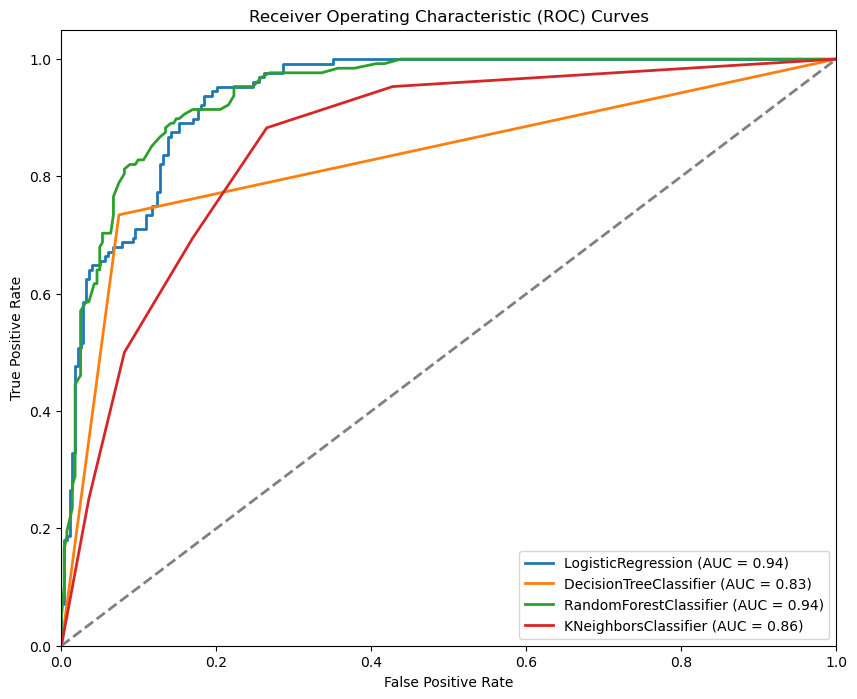

In [25]:
models = [mod.lr, mod.dc, mod.rf, mod.knn]

mod.plot_roc_curves(models,X_train_resampled, y_train_resampled, X_test, y_test)

### **Model 2 - Phone Price Classifier (Expensive or Affordable)**
---

In [26]:
X_train, X_test, y_train, y_test= mod.split_data(new_data, 'Price_binary')
mod.modelplotting_evaluation(X_train, X_test, y_train, y_test)

Model: LogisticRegression(random_state=42)
--------------------------------------------------------------------------------
Confusion matrix:

 [[ 67  27]
 [ 34 283]]

Classification report:               precision    recall  f1-score   support

           0       0.66      0.71      0.69        94
           1       0.91      0.89      0.90       317

    accuracy                           0.85       411
   macro avg       0.79      0.80      0.79       411
weighted avg       0.86      0.85      0.85       411

Accuracy: 0.851581508515815
Precision: 0.9129032258064517
Recall: 0.8927444794952681
F1 score: 0.9027113237639554
--------------------------------------------------------------------------------

Cross-Validation Scores: [0.88541667 0.875      0.86458333 0.84895833 0.89005236]
Mean CV Accuracy: 0.8728021378708553

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
--------------------------------------

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(random_state=42),0.851582,0.892744,0.912903,0.902711
1,DecisionTreeClassifier(random_state=42),0.890511,0.927445,0.930380,0.928910
2,RandomForestClassifier(random_state=42),0.883212,0.914826,0.932476,0.923567
3,KNeighborsClassifier(),0.856448,0.927445,0.890909,0.908810


In [27]:
X_train_resampled, y_train_resampled = mod.apply_smote(X_train, y_train)

*Apply SMOTE to deal with class imbalance*

In [28]:
mod.modelplotting_evaluation(X_train_resampled, X_test, y_train_resampled, y_test)

Model: LogisticRegression(random_state=42)
--------------------------------------------------------------------------------
Confusion matrix:

 [[ 79  15]
 [ 45 272]]

Classification report:               precision    recall  f1-score   support

           0       0.64      0.84      0.72        94
           1       0.95      0.86      0.90       317

    accuracy                           0.85       411
   macro avg       0.79      0.85      0.81       411
weighted avg       0.88      0.85      0.86       411

Accuracy: 0.8540145985401459
Precision: 0.9477351916376306
Recall: 0.8580441640378549
F1 score: 0.9006622516556292
--------------------------------------------------------------------------------

Cross-Validation Scores: [0.82539683 0.85657371 0.88446215 0.92031873 0.88047809]
Mean CV Accuracy: 0.8734458989439069

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
-------------------------------------

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(random_state=42),0.854015,0.858044,0.947735,0.900662
1,DecisionTreeClassifier(random_state=42),0.844282,0.876972,0.917492,0.896774
2,RandomForestClassifier(random_state=42),0.883212,0.902208,0.943894,0.922581
3,KNeighborsClassifier(),0.839416,0.867508,0.919732,0.892857


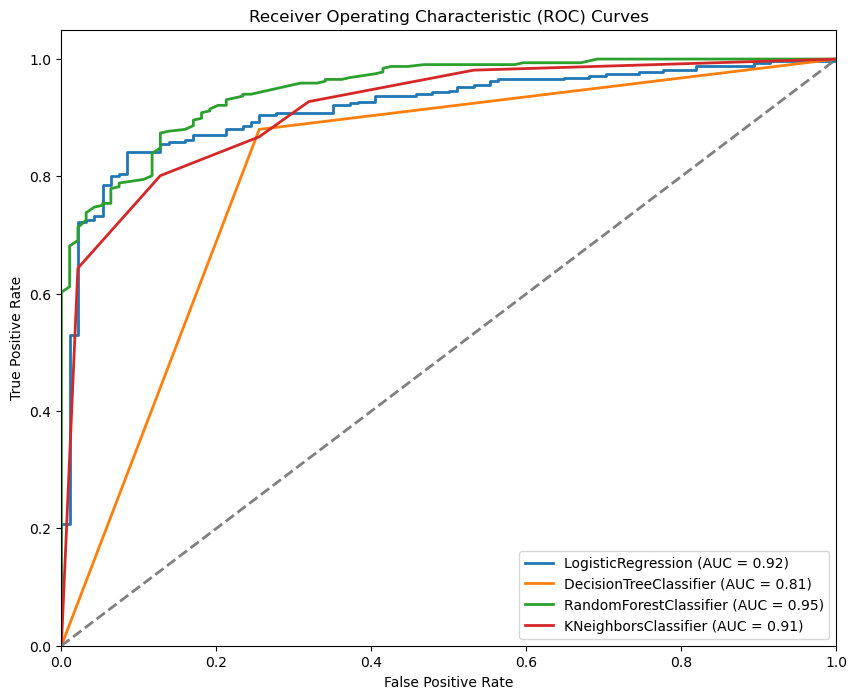

In [29]:
models= [mod.lr, mod.dc, mod.rf, mod.knn]

mod.plot_roc_curves(models, X_train_resampled, y_train_resampled, X_test, y_test)

# **Evaluation**
---
### **Base Model - Phone Specification Classifier (High-Spec or Low-Spec)**
---
1. **Logistic Regression (LR)**:
 
   - **Interpretation**: LR correctly predicts 82.48% of the phone specifications overall. It has a good balance between precision and recall.

2. **Decision Tree Classifier (DTC)**:

   - **Interpretation**: DTC performs well with high accuracy and balanced precision and recall. It may be overfitting the data.

3. **Random Forest Classifier (RFC)**:

   - **Interpretation**: RFC achieves high accuracy and maintains good precision and recall. It's a strong performer.

4. **K-Nearest Neighbors (KNN)**:

   - **Interpretation**: KNN performs adequately but has lower accuracy compared to other models.

Overall, the Random Forest Classifier seems to be the best-performing model for the phone specification classification task.

### **Model 2 - Phone Price Classifier (Expensive or Affordable)**
---
1. **Logistic Regression (LR)**:

   - **Interpretation**: LR correctly predicts 85.16% of phone prices overall. It has high precision, meaning it accurately identifies expensive phones.

2. **Decision Tree Classifier (DTC)**:

   - **Interpretation**: DTC performs well with high accuracy and balanced precision and recall. It may be overfitting the data.

3. **Random Forest Classifier (RFC)**:

   - **Interpretation**: RFC achieves high accuracy and maintains good precision and recall. It's a strong performer.

4. **K-Nearest Neighbors (KNN)**:

   - **Interpretation**: KNN performs adequately but has lower accuracy compared to other models.

Overall, both Decision Tree Classifier and Random Forest Classifier seem to be good choices for the phone price classification task.

### **Metrics Justification:**
- **Accuracy**: Measures overall correctness but may not be sensitive to class imbalances.

- **Recall**: Important for identifying true positives (e.g., correctly predicting high-spec phones).

- **Precision**: Relevant for minimizing false positives (e.g., not misclassifying low-spec phones as high-spec).

- **F1 Score**: Balances precision and recall.

### **Final Model Recommendation:**
- Considering the business context, I recommend using the **Random Forest Classifier** for both the **Phone Specification Classifier** and **Phone Price Classifier**.

- It has the highest accuracy and is interpretable.

### **Implications:**
---
- By predicting whether a phone is high-spec or low-spec, Samsung can:

    - Optimize marketing strategies for each category.

    - Allocate resources effectively for the upcoming new product.📱

    - Enhance customer satisfaction by focusing on key features.

# Conclusions
## Feature Recommendations

In [30]:
# Create a new column 'phone_category' based on 'Spec_score_category' and 'Price_category'
data['phone_category'] = data['Spec_score_category'] + ', ' + data['Price_category']

# Plots
eda.plot_features_against_price(data, feature_y = 'filtered_ram', color_feature = 'phone_category',
                                symbol_feature = 'phone_category',
                                plot_title = "Phone Price and RAM Recommendation")
eda.plot_features_against_price(data, feature_y = 'Processor', color_feature = 'phone_category',
                                 symbol_feature = 'phone_category',
                                 plot_title = "Phone Price and Processor Recommendation")
eda.plot_features_against_price(data, feature_y = 'Inbuilt_memory', color_feature = 'phone_category',
                                 symbol_feature = 'phone_category',
                                 plot_title = "Phone Price and Inbuilt Memory Recommendation")
eda.plot_features_against_price(data, feature_y = 'Display_size_inches', color_feature = 'phone_category',
                                 symbol_feature = 'phone_category',
                                 plot_title = "Phone Price and Display Size Recommendation")
eda.plot_features_against_price(data, feature_y = 'Battery_numeric', color_feature = 'phone_category',
                                 symbol_feature = 'phone_category',
                                 plot_title = "Phone Price and Battery Capacity Recommendation")

*Recommendations*

In [31]:
# Create a DataFrame with Feature and Recommendation columns

# Define the recommendations dictionary
recommendations = {'Price': '42K', 'RAM': '8 GB & 12 GB', 'Processor': 'Octa Core', 
                    'Inbuilt Memory': '128 GB or 256 GB', 'Display Size': '6.1 - 6.5 inches', 
                    'Battery Capacity': '5000 mAh'}

# Create the DataFrame
df = pd.DataFrame(list(recommendations.items()), columns=['Feature', 'Recommendation'])
df

,Feature,Recommendation
0,Price,42K
1,RAM,8 GB & 12 GB
2,Processor,Octa Core
3,Inbuilt Memory,128 GB or 256 GB
4,Display Size,6.1 - 6.5 inches
5,Battery Capacity,5000 mAh
